Evaluating for N=100, D=5
Evaluating for N=100, D=40
Evaluating for N=100, D=100
Evaluating for N=1000, D=5
Evaluating for N=1000, D=40
Evaluating for N=1000, D=100
Evaluating for N=10000, D=5
Evaluating for N=10000, D=40
Evaluating for N=10000, D=100


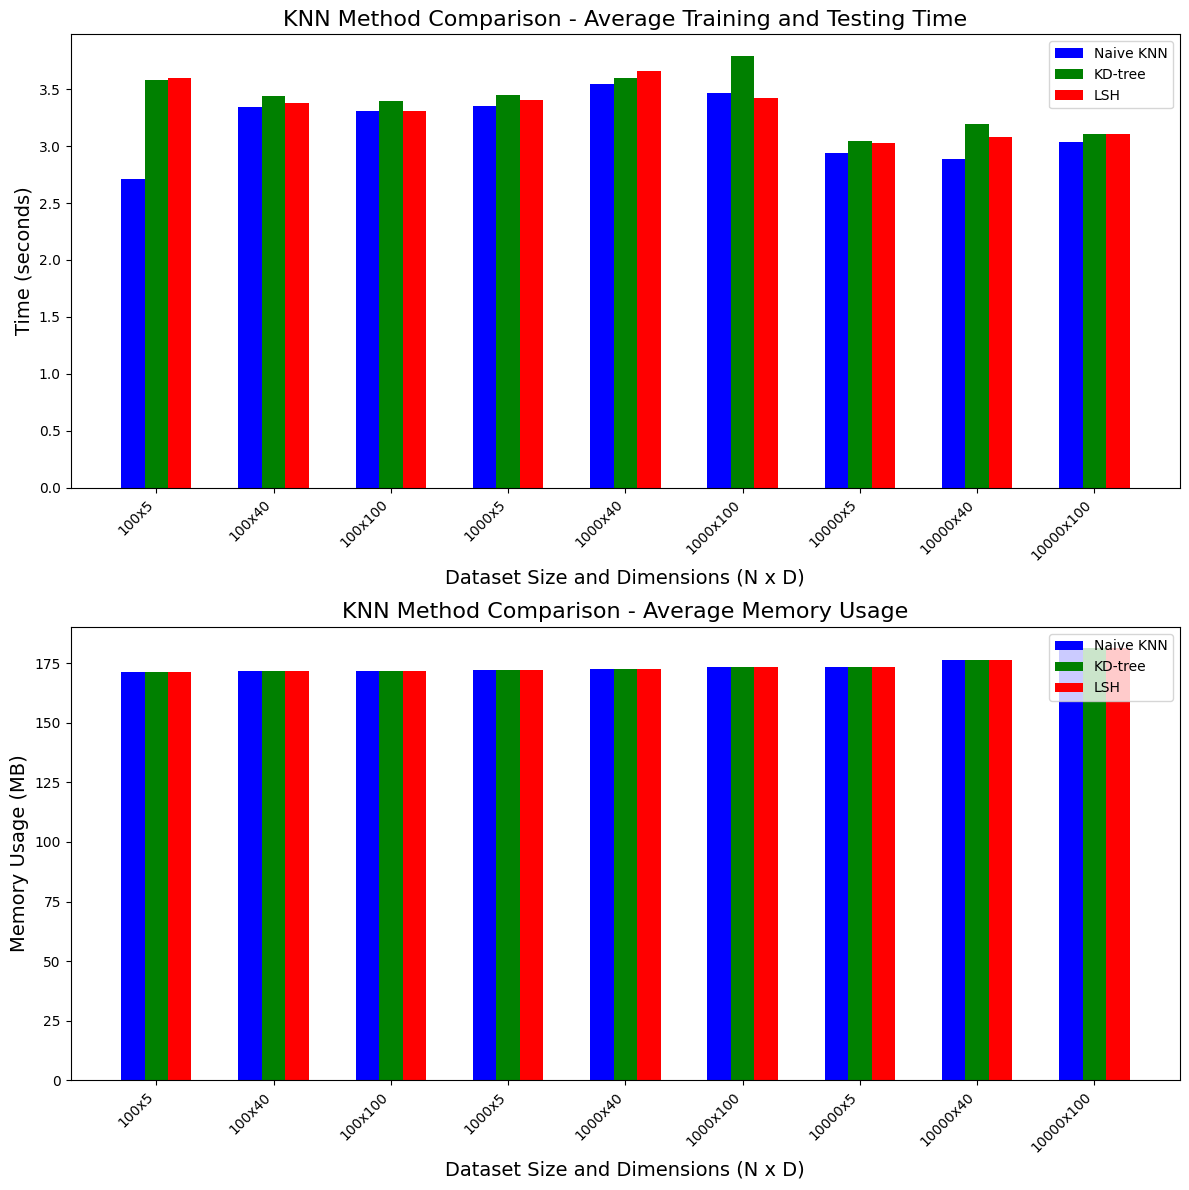

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def naive_knn(data, query, k):
    """Naive KNN using sklearn's NearestNeighbors."""
    neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
    neigh.fit(data)
    indices = neigh.kneighbors(query, return_distance=False)
    return indices

def evaluate_knn_methods(N, D, k, num_queries=10, num_runs=10):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.
    Run multiple iterations to compute average time and memory usage.
    """
    data = np.random.rand(N, D)  # Random dataset
    queries = np.random.rand(num_queries, D)  # Multiple query points

    # Function to track memory usage during a specific block of code
    def memory_function(func, *args, **kwargs):
        mem_usage = memory_usage(proc=(func, args, kwargs))
        return max(mem_usage)  # Get the maximum memory usage from the list

    # Initialize accumulators for time and memory
    naive_times, kd_times, lsh_times = [], [], []
    naive_memories, kd_memories, lsh_memories = [], [], []

    for _ in range(num_runs):
        # Naive KNN
        start = time.time()
        naive_mem = memory_function(naive_knn, data, queries, k)
        naive_time = time.time() - start
        naive_times.append(naive_time)
        naive_memories.append(naive_mem)

        # KD-tree
        start = time.time()
        kd_tree = KDTree(data)
        kd_mem = memory_function(kd_tree.query, queries, k)
        kd_time = time.time() - start
        kd_times.append(kd_time)
        kd_memories.append(kd_mem)

        # LSH
        start = time.time()
        lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
        lsh.fit(data)
        lsh_mem = memory_function(lsh.kneighbors, queries, return_distance=False)
        lsh_time = time.time() - start
        lsh_times.append(lsh_time)
        lsh_memories.append(lsh_mem)

    # Compute averages
    results = {
        'naive_time': np.mean(naive_times),
        'naive_mem': np.mean(naive_memories),
        'kd_time': np.mean(kd_times),
        'kd_mem': np.mean(kd_memories),
        'lsh_time': np.mean(lsh_times),
        'lsh_mem': np.mean(lsh_memories),
    }

    return results

# Prepare data for plotting
N_values = [100, 1000, 10000]
D_values = [5, 40, 100]
k = 5

# Lists to store results
naive_times, kd_times, lsh_times = [], [], []
naive_memories, kd_memories, lsh_memories = [], [], []

# Evaluate KNN methods for different N and D combinations
for N in N_values:
    for D in D_values:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k, num_queries=10, num_runs=10)

        # Store results for times and memory
        naive_times.append(results['naive_time'])
        kd_times.append(results['kd_time'])
        lsh_times.append(results['lsh_time'])

        naive_memories.append(results['naive_mem'])
        kd_memories.append(results['kd_mem'])
        lsh_memories.append(results['lsh_mem'])

# Plotting the results

# Time comparison
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Time plot
x = np.arange(len(naive_times))  # X axis positions for each N x D combination
width = 0.2  # Bar width
ax[0].bar(x - width, naive_times, width, label='Naive KNN', color='blue')
ax[0].bar(x, kd_times, width, label='KD-tree', color='green')
ax[0].bar(x + width, lsh_times, width, label='LSH', color='red')

ax[0].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[0].set_ylabel('Time (seconds)', fontsize=14)
ax[0].set_title('KNN Method Comparison - Average Training and Testing Time', fontsize=16)
ax[0].set_xticks(x)
ax[0].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[0].legend()

# Memory plot
ax[1].bar(x - width, naive_memories, width, label='Naive KNN', color='blue')
ax[1].bar(x, kd_memories, width, label='KD-tree', color='green')
ax[1].bar(x + width, lsh_memories, width, label='LSH', color='red')

ax[1].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[1].set_ylabel('Memory Usage (MB)', fontsize=14)
ax[1].set_title('KNN Method Comparison - Average Memory Usage', fontsize=16)
ax[1].set_xticks(x)
ax[1].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[1].legend()

plt.tight_layout()
plt.show()


Evaluating for N=100, D=2
Naive Time: 0.002980s, KD-tree Time: 0.000999s, LSH Time: 0.001999s
Evaluating for N=100, D=10
Naive Time: 0.000000s, KD-tree Time: 0.001001s, LSH Time: 0.001000s
Evaluating for N=100, D=50
Naive Time: 0.000000s, KD-tree Time: 0.001002s, LSH Time: 0.045089s
Evaluating for N=1000, D=2
Naive Time: 0.000000s, KD-tree Time: 0.000993s, LSH Time: 0.001012s
Evaluating for N=1000, D=10
Naive Time: 0.000000s, KD-tree Time: 0.001987s, LSH Time: 0.003011s
Evaluating for N=1000, D=50
Naive Time: 0.000000s, KD-tree Time: 0.005034s, LSH Time: 0.037001s
Evaluating for N=5000, D=2
Naive Time: 0.000998s, KD-tree Time: 0.001999s, LSH Time: 0.004999s
Evaluating for N=5000, D=10
Naive Time: 0.000999s, KD-tree Time: 0.011022s, LSH Time: 0.012980s
Evaluating for N=5000, D=50
Naive Time: 0.000999s, KD-tree Time: 0.030999s, LSH Time: 0.027001s


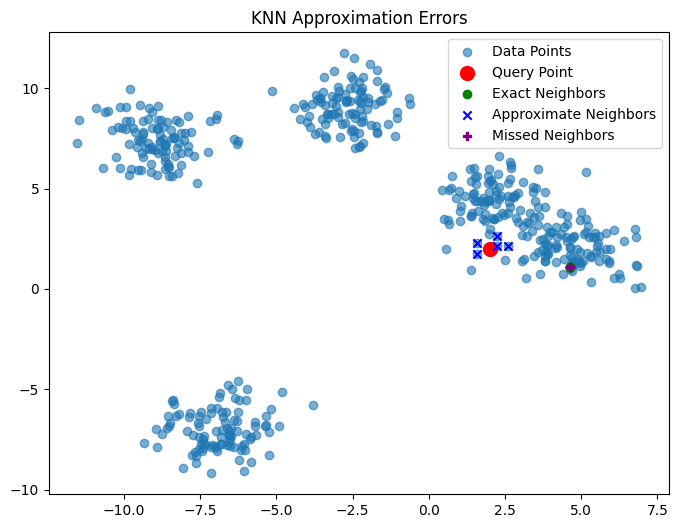

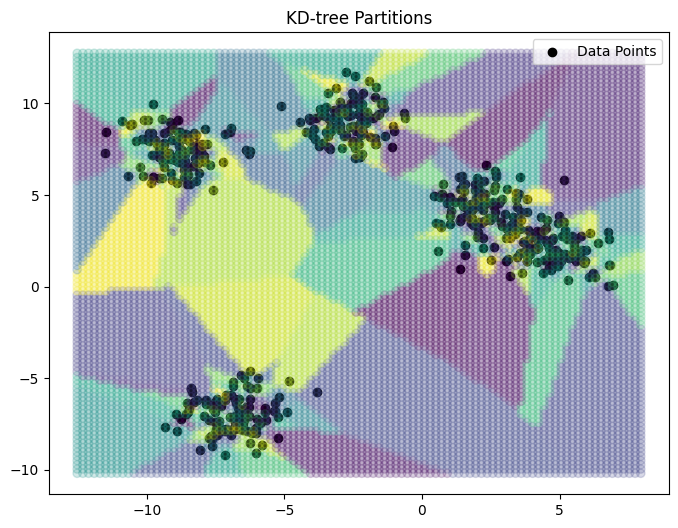

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
from scipy.spatial import distance
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from sklearn.datasets import make_blobs


def naive_knn(data, query, k):
    """Naive KNN using pairwise distances."""
    dists = distance.cdist(query, data, metric='euclidean')
    indices = np.argsort(dists, axis=1)[:, :k]
    return indices


def evaluate_knn_methods(N, D, k):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.

    Parameters:
        N: Number of data points.
        D: Number of dimensions.
        k: Number of neighbors to find.
    """
    data = np.random.rand(N, D)  # Random dataset
    query = np.random.rand(1, D)  # Single query point

    results = {}

    # Naive KNN
    start = time.time()
    naive_indices = naive_knn(data, query, k)
    results['naive_time'] = time.time() - start

    # KD-tree
    start = time.time()
    kd_tree = KDTree(data)
    kd_indices, _ = kd_tree.query(query, k)
    results['kd_time'] = time.time() - start

    # LSH
    start = time.time()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    lsh.fit(data)
    lsh_indices = lsh.kneighbors(query, return_distance=False)
    results['lsh_time'] = time.time() - start

    results['naive_indices'] = naive_indices
    results['kd_indices'] = kd_indices
    results['lsh_indices'] = lsh_indices

    return results


# Vary dataset size and dimensions
for N in [100, 1000, 5000]:
    for D in [2, 10, 50]:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k=5)
        print(f"Naive Time: {results['naive_time']:.6f}s, KD-tree Time: {results['kd_time']:.6f}s, LSH Time: {results['lsh_time']:.6f}s")

def visualize_2d_approximation_errors():
    # Generate 2D dataset
    data, _ = make_blobs(n_samples=500, centers=5, n_features=2, random_state=42)
    query = np.array([2, 2])  # Query point

    # Exact (KD-tree)
    kd_tree = KDTree(data)
    exact_indices, _ = kd_tree.query(query.reshape(1, -1), k=5)
    exact_indices = exact_indices.astype(int)  # Ensure integer indices

    # Approximate (LSH)
    lsh = NearestNeighbors(n_neighbors=5, algorithm='auto')
    lsh.fit(data)
    approx_indices = lsh.kneighbors(query.reshape(1, -1), return_distance=False)
    approx_indices = approx_indices.astype(int)  # Ensure integer indices

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label="Data Points")
    plt.scatter(query[0], query[1], color='red', label="Query Point", s=100)
    plt.scatter(data[exact_indices[0], 0], data[exact_indices[0], 1], color='green', label="Exact Neighbors")
    plt.scatter(data[approx_indices[0], 0], data[approx_indices[0], 1], color='blue', label="Approximate Neighbors", marker='x')

    # Highlight missed neighbors
    missed = set(exact_indices[0]) - set(approx_indices[0])
    for idx in missed:
        plt.scatter(data[idx, 0], data[idx, 1], color='purple', label="Missed Neighbors", marker='P')

    plt.legend()
    plt.title("KNN Approximation Errors")
    plt.show()


def visualize_kdtree_partitions(data):
    kd_tree = KDTree(data)

    # Generate grid for visualization
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Query all grid points
    _, indices = kd_tree.query(grid_points, k=1)

    # Colorize partitions based on nearest neighbor
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c='black', label="Data Points")
    plt.scatter(grid_points[:, 0], grid_points[:, 1], c=indices, cmap='viridis', alpha=0.2)
    plt.title("KD-tree Partitions")
    plt.legend()
    plt.show()


# Run visualizations
visualize_2d_approximation_errors()

data, _ = make_blobs(n_samples=500, centers=5, n_features=2, random_state=42)
visualize_kdtree_partitions(data)


Evaluating for N=100, D=2
Naive Time: 0.000000s, KD-tree Time: 0.001001s, LSH Time: 0.001401s
Evaluating for N=100, D=10
Naive Time: 0.001014s, KD-tree Time: 0.000000s, LSH Time: 0.001997s
Evaluating for N=100, D=50
Naive Time: 0.000000s, KD-tree Time: 0.000000s, LSH Time: 0.031832s
Evaluating for N=1000, D=2
Naive Time: 0.000000s, KD-tree Time: 0.001003s, LSH Time: 0.001001s
Evaluating for N=1000, D=10
Naive Time: 0.000000s, KD-tree Time: 0.000997s, LSH Time: 0.001998s
Evaluating for N=1000, D=50
Naive Time: 0.000000s, KD-tree Time: 0.002997s, LSH Time: 0.020084s
Evaluating for N=5000, D=2
Naive Time: 0.000000s, KD-tree Time: 0.002940s, LSH Time: 0.003000s
Evaluating for N=5000, D=10
Naive Time: 0.000997s, KD-tree Time: 0.005977s, LSH Time: 0.007008s
Evaluating for N=5000, D=50
Naive Time: 0.001002s, KD-tree Time: 0.025995s, LSH Time: 0.019026s


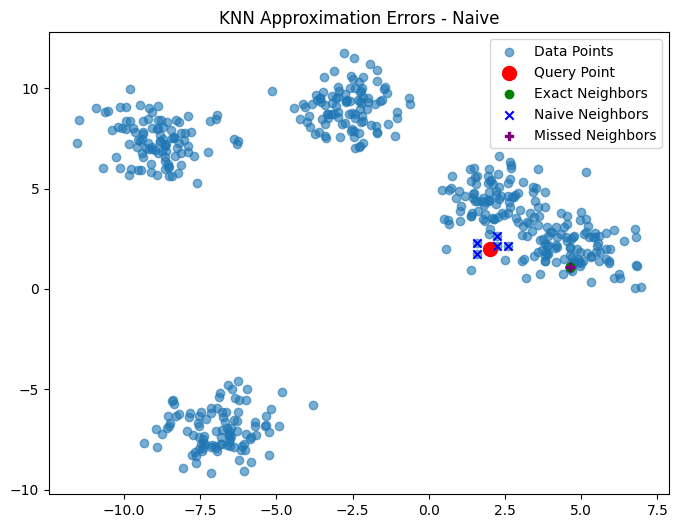

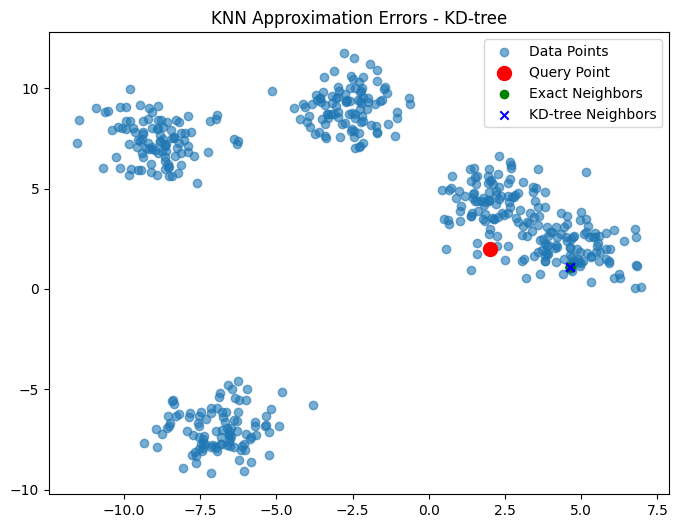

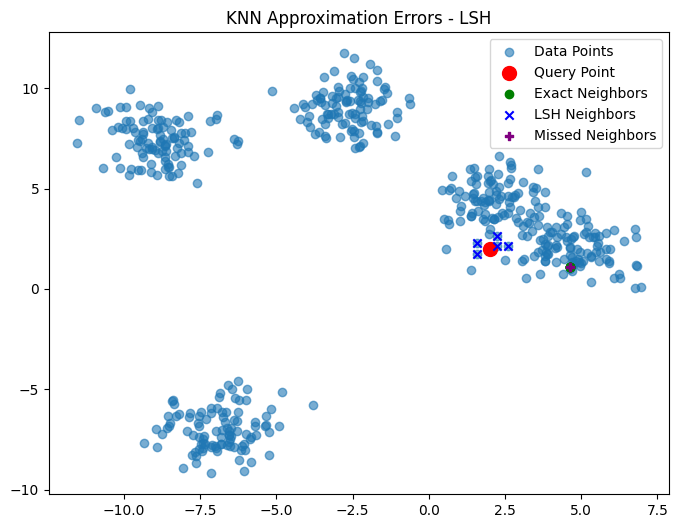

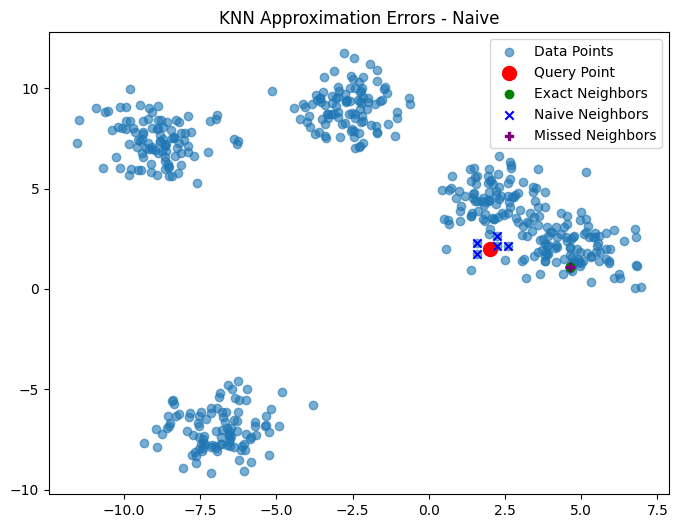

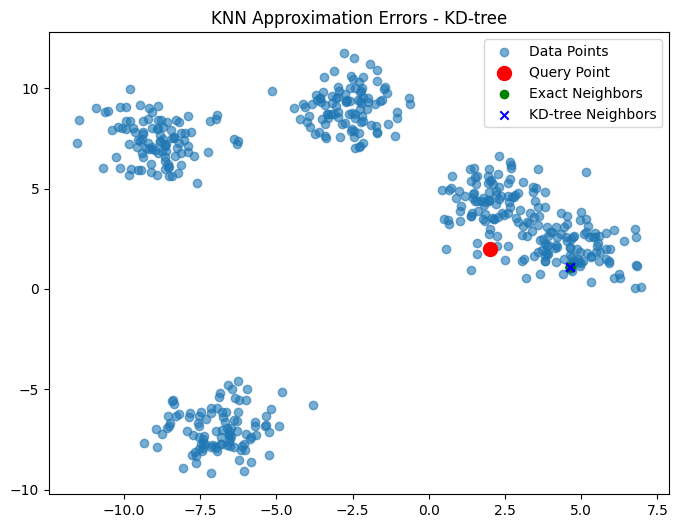

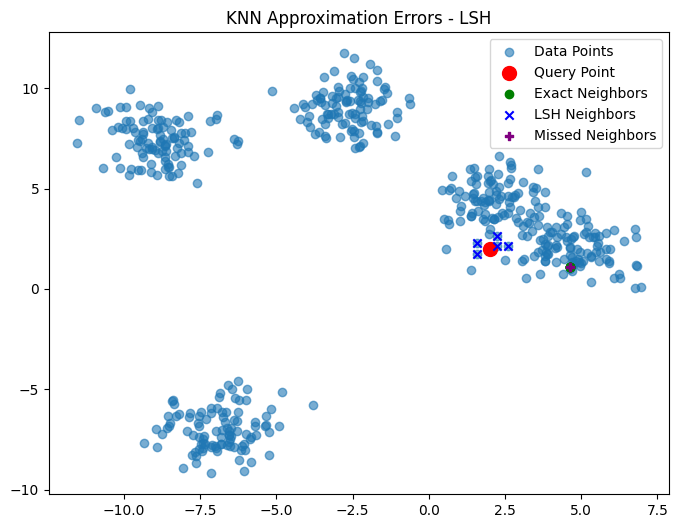

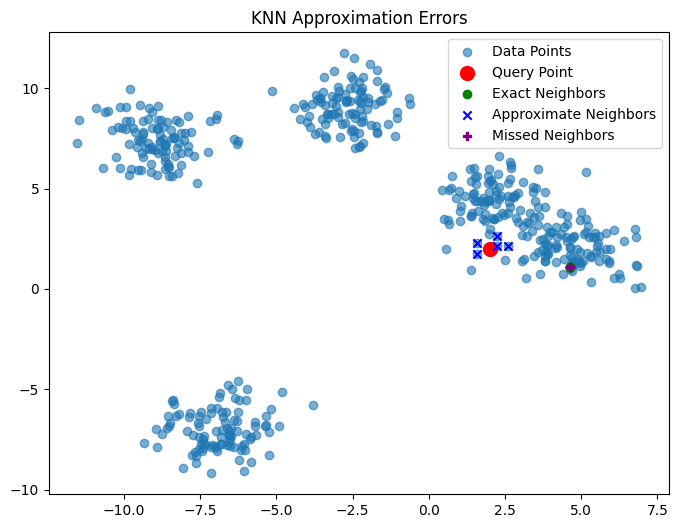

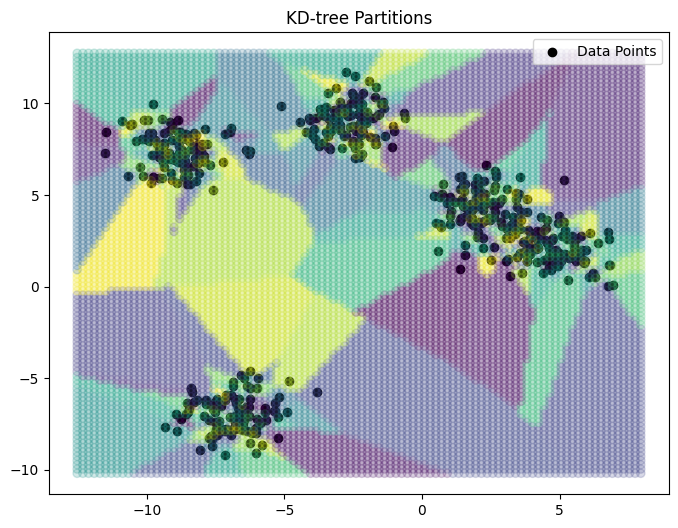

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


def naive_knn(data, query, k):
    """Naive KNN using pairwise distances."""
    dists = distance.cdist(query, data, metric='euclidean')
    indices = np.argsort(dists, axis=1)[:, :k]
    return indices


def visualize_knn_approximation_subplot(data, query, method_name, indices, exact_indices, ax):
    """Visualize the KNN results for a specific method using subplots."""
    # Ensure that indices are integer types
    indices = indices.astype(int)
    exact_indices = exact_indices.astype(int)
    
    ax.scatter(data[:, 0], data[:, 1], alpha=0.6, label="Data Points")
    ax.scatter(query[0], query[1], color='red', label="Query Point", s=100)
    ax.scatter(data[exact_indices[0], 0], data[exact_indices[0], 1], color='green', label="Exact Neighbors")
    ax.scatter(data[indices[0], 0], data[indices[0], 1], color='blue', label=f"{method_name} Neighbors", marker='x')

    # Highlight missed neighbors
    missed = set(exact_indices[0]) - set(indices[0])
    for idx in missed:
        ax.scatter(data[idx, 0], data[idx, 1], color='purple', label="Missed Neighbors", marker='P')

    ax.set_title(f"KNN Approximation - {method_name}")
    ax.legend()


# Generate 2D dataset
data, _ = make_blobs(n_samples=500, centers=5, n_features=2, random_state=42)
query = np.array([2, 2]).reshape(1, -1)

# Exact neighbors using KD-tree (benchmark)
kd_tree = KDTree(data)
exact_indices, _ = kd_tree.query(query, k=5)
exact_indices = exact_indices.astype(int)

# Get indices for each method
naive_indices = naive_knn(data, query, k=5)
kd_indices, _ = kd_tree.query(query, k=5)
lsh = NearestNeighbors(n_neighbors=5, algorithm='auto')
lsh.fit(data)
lsh_indices = lsh.kneighbors(query, return_distance=False)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
methods = [("Naive", naive_indices), ("KD-tree", kd_indices), ("LSH", lsh_indices)]

for ax, (method_name, method_indices) in zip(axes, methods):
    visualize_knn_approximation_subplot(data, query.flatten(), method_name, method_indices, exact_indices, ax)

plt.tight_layout()
plt.show()


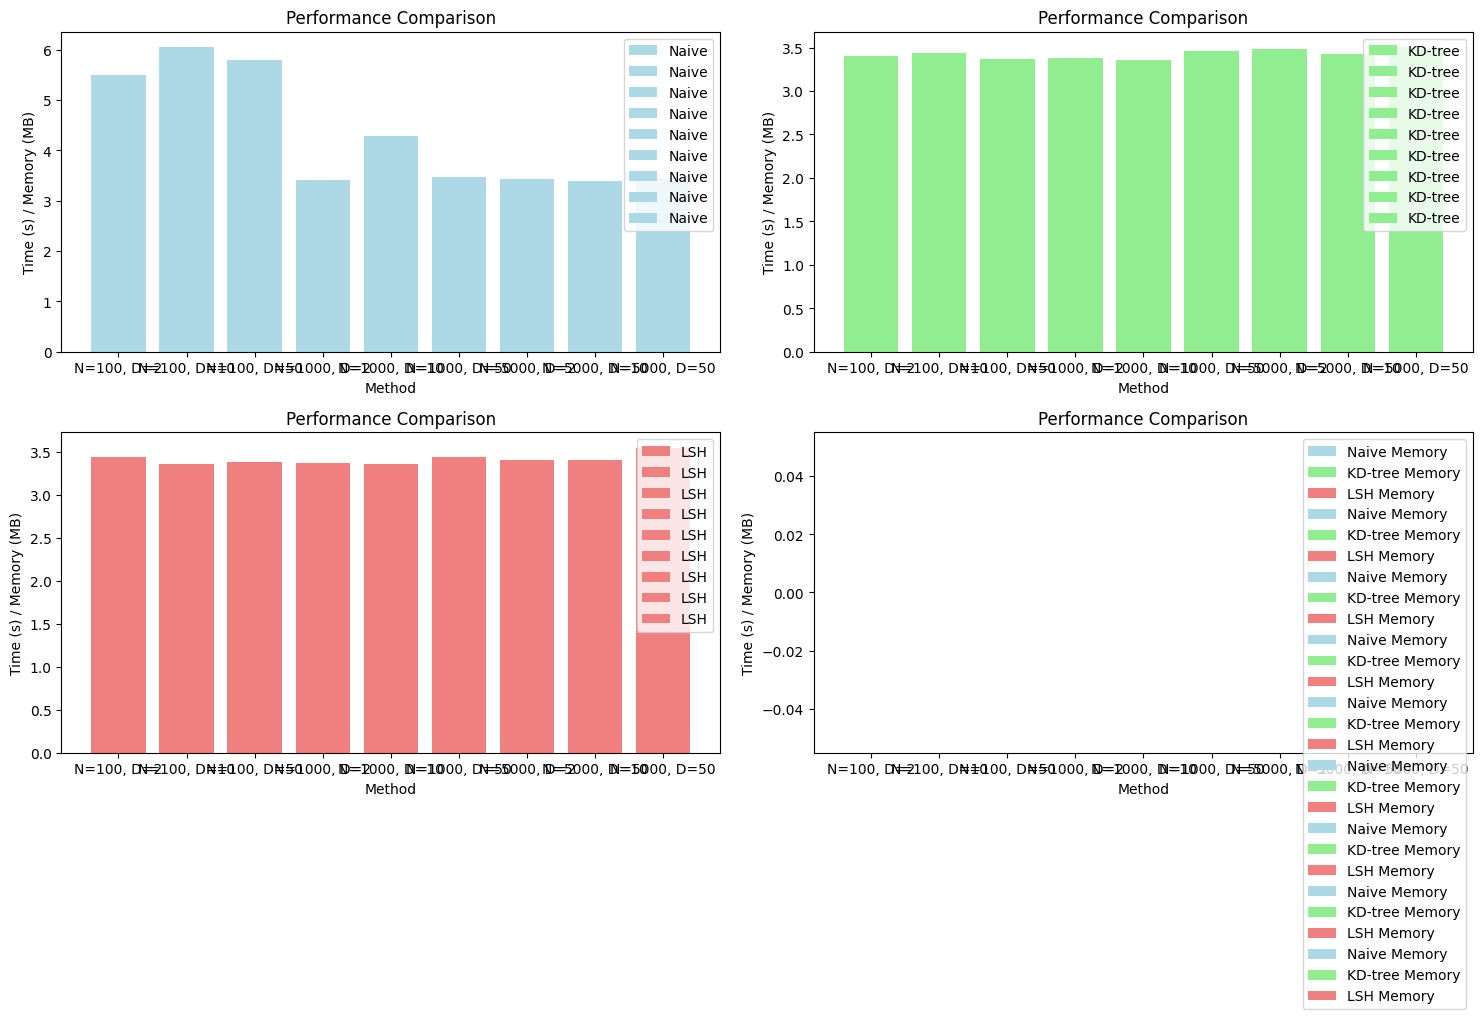

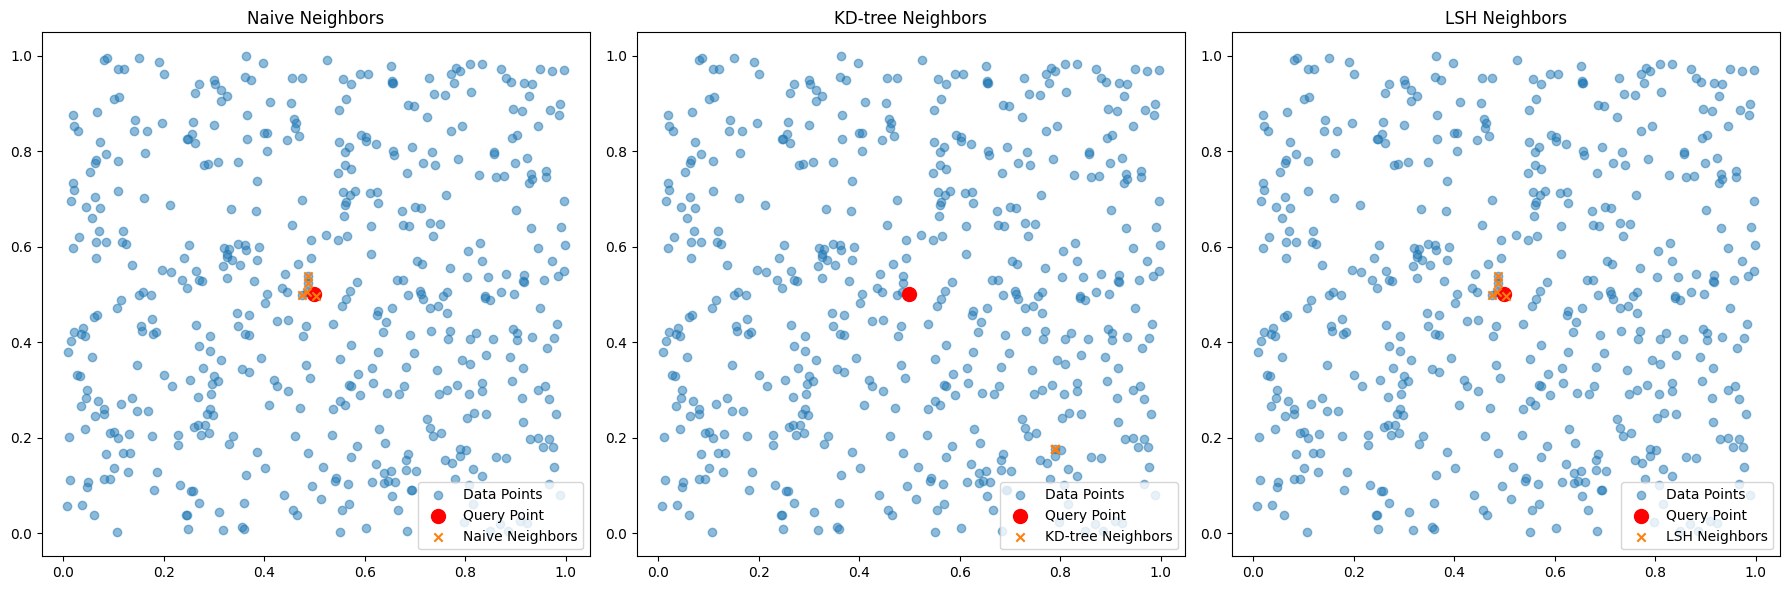

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from scipy.spatial import distance
from memory_profiler import memory_usage

def naive_knn(data, query, k):
    """Naive KNN using pairwise distances."""
    dists = distance.cdist(query, data, metric='euclidean')
    indices = np.argsort(dists, axis=1)[:, :k]
    return indices

def evaluate_knn_methods(N, D, k):
    """Evaluate training and testing times and memory usage for KNN methods."""
    data = np.random.rand(N, D)
    query = np.random.rand(1, D)
    results = {}

    # Naive KNN
    start = time.time()
    mem_naive = memory_usage((naive_knn, (data, query, k)))
    naive_indices = naive_knn(data, query, k)
    results['naive_time'] = time.time() - start
    results['naive_mem'] = max(mem_naive) - min(mem_naive)

    # KD-tree
    start = time.time()
    mem_kd = memory_usage((KDTree, (data,)))
    kd_tree = KDTree(data)
    kd_indices, _ = kd_tree.query(query, k)
    results['kd_time'] = time.time() - start
    results['kd_mem'] = max(mem_kd) - min(mem_kd)

    # LSH
    start = time.time()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    mem_lsh = memory_usage((lsh.fit, (data,)))
    lsh_indices = lsh.kneighbors(query, return_distance=False)
    results['lsh_time'] = time.time() - start
    results['lsh_mem'] = max(mem_lsh) - min(mem_lsh)

    results['naive_indices'] = naive_indices
    results['kd_indices'] = kd_indices
    results['lsh_indices'] = lsh_indices

    return results

def plot_results(dataset_sizes, dimensions, k):
    """Plot comparison of times and memory usage."""
    results = []
    for N in dataset_sizes:
        for D in dimensions:
            result = evaluate_knn_methods(N, D, k)
            result.update({'N': N, 'D': D})
            results.append(result)
    
    # Create subplots to show time and memory comparisons
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    for res in results:
        N, D = res['N'], res['D']
        label = f'N={N}, D={D}'
        axes[0, 0].bar(label, res['naive_time'], label='Naive', color='lightblue')
        axes[0, 1].bar(label, res['kd_time'], label='KD-tree', color='lightgreen')
        axes[1, 0].bar(label, res['lsh_time'], label='LSH', color='lightcoral')
        axes[1, 1].bar(label, res['naive_mem'], label='Naive Memory', color='lightblue')
        axes[1, 1].bar(label, res['kd_mem'], label='KD-tree Memory', color='lightgreen')
        axes[1, 1].bar(label, res['lsh_mem'], label='LSH Memory', color='lightcoral')

    for ax in axes.flat:
        ax.legend()
        ax.set_xlabel('Method')
        ax.set_ylabel('Time (s) / Memory (MB)')
        ax.set_title('Performance Comparison')

    plt.tight_layout()
    plt.show()

# Fix the visualization function to ensure indices are integer types
def visualize_knn_errors(data, query, k=5):
    methods = ['Naive', 'KD-tree', 'LSH']
    indices_list = []

    # Naive KNN
    naive_indices = naive_knn(data, query, k).astype(int)
    indices_list.append(naive_indices)

    # KD-tree KNN
    kd_tree = KDTree(data)
    kd_indices, _ = kd_tree.query(query, k)
    kd_indices = kd_indices.astype(int)  # Convert to integer type if needed
    indices_list.append(kd_indices)

    # LSH KNN
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    lsh.fit(data)
    lsh_indices = lsh.kneighbors(query, return_distance=False).astype(int)
    indices_list.append(lsh_indices)

    # Plotting the results
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    for i, method in enumerate(methods):
        ax[i].scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data Points')
        ax[i].scatter(query[:, 0], query[:, 1], color='red', label='Query Point', s=100)
        ax[i].scatter(data[indices_list[i][0], 0], data[indices_list[i][0], 1], label=f'{method} Neighbors', marker='x')
        ax[i].set_title(f'{method} Neighbors')
        ax[i].legend()

    plt.tight_layout()
    plt.show()


# Run the visualizations
dataset_sizes = [100, 1000, 5000]
dimensions = [2, 10, 50]
plot_results(dataset_sizes, dimensions, k=5)

# Generate 2D dataset for visualization
data, _ = np.random.rand(500, 2), None
query = np.array([[0.5, 0.5]])
visualize_knn_errors(data, query, k=5)


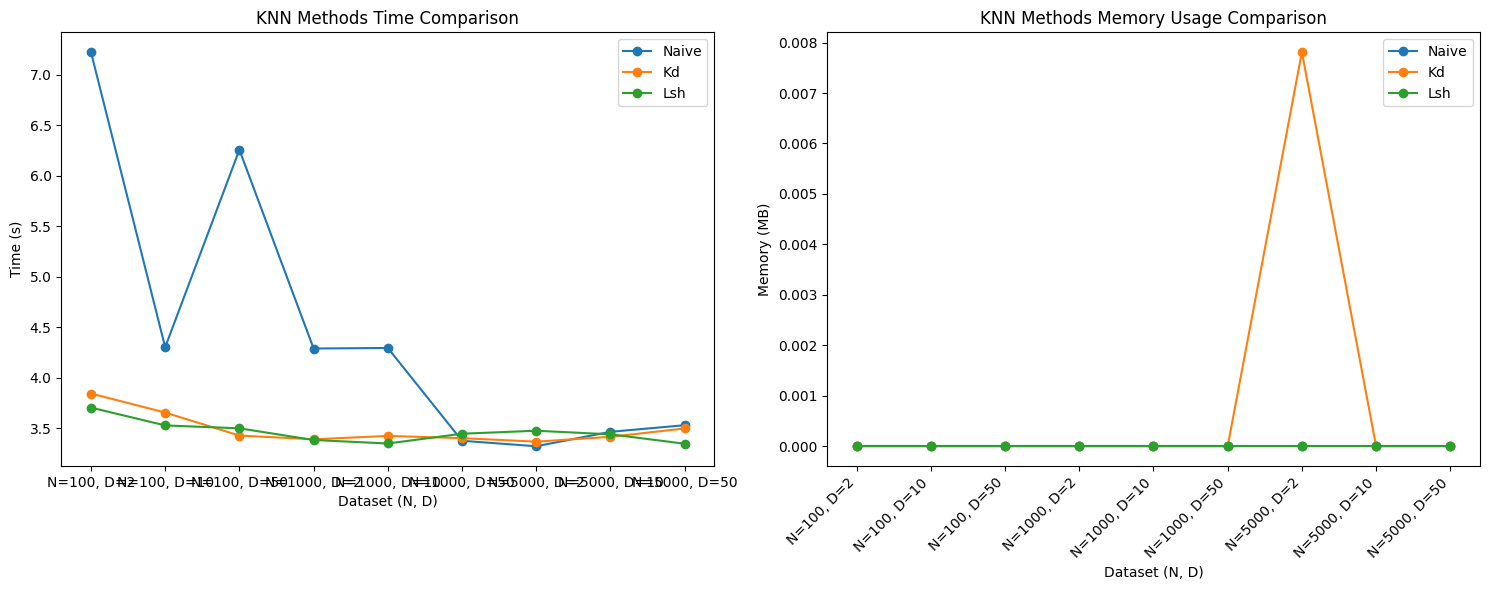

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from scipy.spatial import distance
from memory_profiler import memory_usage

def naive_knn(data, query, k):
    """Naive KNN using pairwise distances."""
    dists = distance.cdist(query, data, metric='euclidean')
    indices = np.argsort(dists, axis=1)[:, :k]
    return indices

def evaluate_knn_methods(N, D, k):
    """Evaluate training and testing times and memory usage for KNN methods."""
    data = np.random.rand(N, D)
    query = np.random.rand(1, D)
    results = {}

    # Naive KNN
    start = time.time()
    mem_naive = memory_usage((naive_knn, (data, query, k)))
    naive_indices = naive_knn(data, query, k)
    results['naive_time'] = time.time() - start
    results['naive_mem'] = max(mem_naive) - min(mem_naive)

    # KD-tree
    start = time.time()
    mem_kd = memory_usage((KDTree, (data,)))
    kd_tree = KDTree(data)
    kd_indices, _ = kd_tree.query(query, k)
    results['kd_time'] = time.time() - start
    results['kd_mem'] = max(mem_kd) - min(mem_kd)

    # LSH
    start = time.time()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    mem_lsh = memory_usage((lsh.fit, (data,)))
    lsh_indices = lsh.kneighbors(query, return_distance=False)
    results['lsh_time'] = time.time() - start
    results['lsh_mem'] = max(mem_lsh) - min(mem_lsh)

    results['naive_indices'] = naive_indices
    results['kd_indices'] = kd_indices
    results['lsh_indices'] = lsh_indices

    return results

def plot_results(dataset_sizes, dimensions, k):
    """Plot comparison of times and memory usage using line plots."""
    results = []
    for N in dataset_sizes:
        for D in dimensions:
            result = evaluate_knn_methods(N, D, k)
            result.update({'N': N, 'D': D})
            results.append(result)

    # Prepare for plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Time comparison plot
    for method in ['naive_time', 'kd_time', 'lsh_time']:
        times = [res[method] for res in results]
        labels = [f'N={res["N"]}, D={res["D"]}' for res in results]
        axes[0].plot(labels, times, marker='o', label=method.replace('_time', '').capitalize())

    # Memory usage comparison plot
    for method in ['naive_mem', 'kd_mem', 'lsh_mem']:
        mem_usages = [res[method] for res in results]
        labels = [f'N={res["N"]}, D={res["D"]}' for res in results]
        axes[1].plot(labels, mem_usages, marker='o', label=method.replace('_mem', '').capitalize())
    
    # Set titles and labels
    axes[0].set_title('KNN Methods Time Comparison')
    axes[0].set_xlabel('Dataset (N, D)')
    axes[0].set_ylabel('Time (s)')
    axes[0].legend()
    
    axes[1].set_title('KNN Methods Memory Usage Comparison')
    axes[1].set_xlabel('Dataset (N, D)')
    axes[1].set_ylabel('Memory (MB)')
    axes[1].legend()

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Run the visualizations
dataset_sizes = [100, 1000, 5000]
dimensions = [2, 10, 50]
plot_results(dataset_sizes, dimensions, k=5)


Evaluating for N=100, D=5
Evaluating for N=100, D=40
Evaluating for N=100, D=100
Evaluating for N=1000, D=5
Evaluating for N=1000, D=40
Evaluating for N=1000, D=100
Evaluating for N=10000, D=5
Evaluating for N=10000, D=40
Evaluating for N=10000, D=100


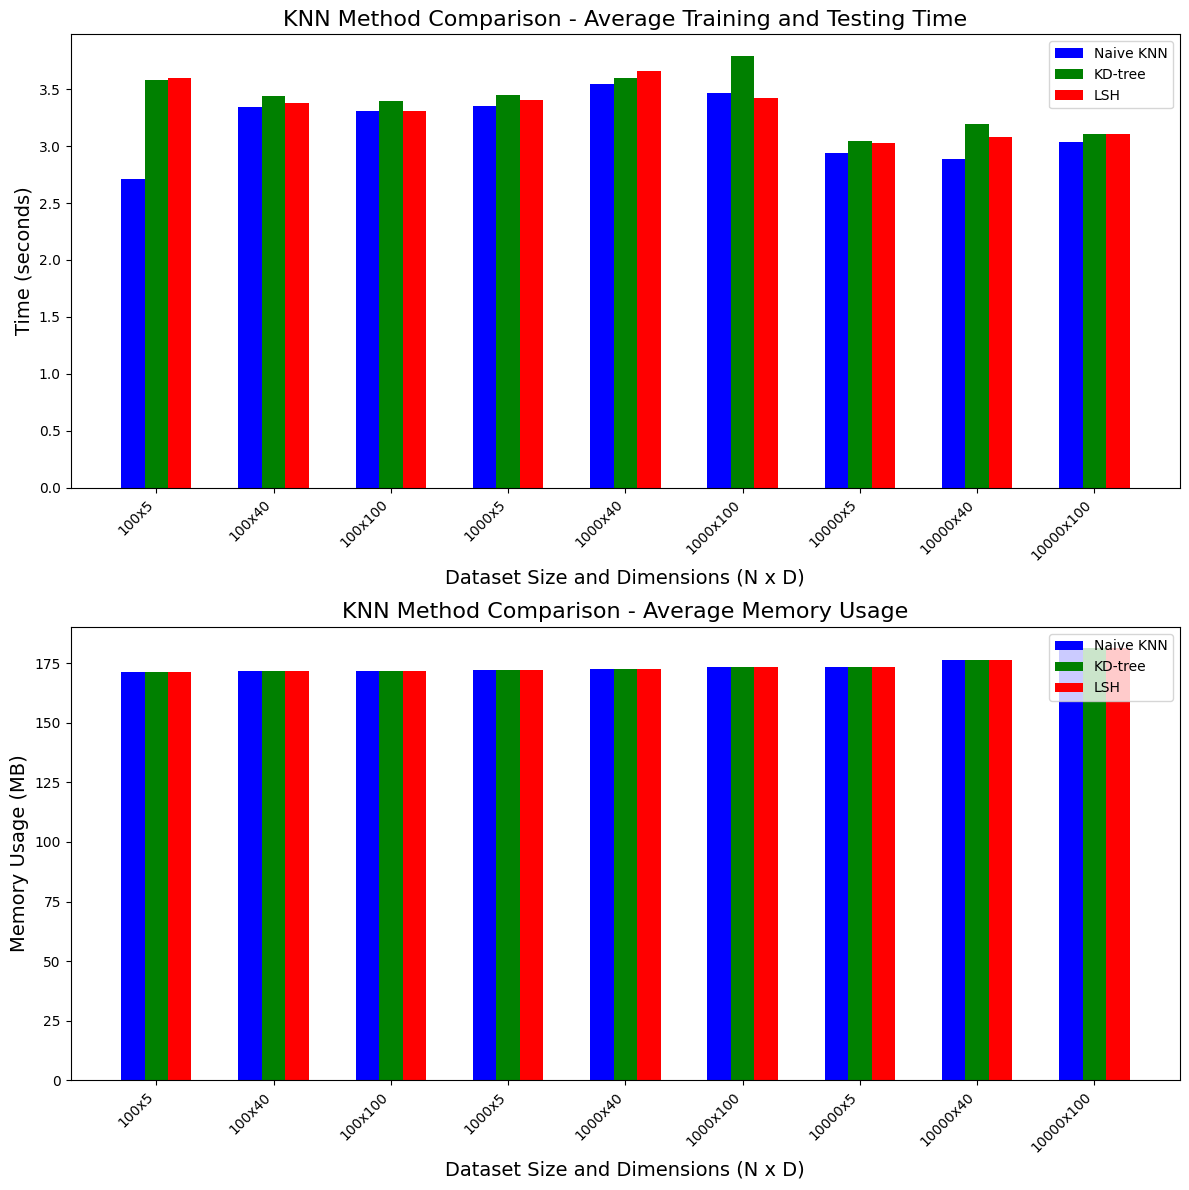

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def naive_knn(data, query, k):
    """Naive KNN using sklearn's NearestNeighbors."""
    neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
    neigh.fit(data)
    indices = neigh.kneighbors(query, return_distance=False)
    return indices

def evaluate_knn_methods(N, D, k, num_queries=10, num_runs=10):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.
    Run multiple iterations to compute average time and memory usage.
    """
    data = np.random.rand(N, D)  # Random dataset
    queries = np.random.rand(num_queries, D)  # Multiple query points

    # Function to track memory usage during a specific block of code
    def memory_function(func, *args, **kwargs):
        mem_usage = memory_usage(proc=(func, args, kwargs))
        return max(mem_usage)  # Get the maximum memory usage from the list

    # Initialize accumulators for time and memory
    naive_times, kd_times, lsh_times = [], [], []
    naive_memories, kd_memories, lsh_memories = [], [], []

    for _ in range(num_runs):
        # Naive KNN
        start = time.time()
        naive_mem = memory_function(naive_knn, data, queries, k)
        naive_time = time.time() - start
        naive_times.append(naive_time)
        naive_memories.append(naive_mem)

        # KD-tree
        start = time.time()
        kd_tree = KDTree(data)
        kd_mem = memory_function(kd_tree.query, queries, k)
        kd_time = time.time() - start
        kd_times.append(kd_time)
        kd_memories.append(kd_mem)

        # LSH
        start = time.time()
        lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
        lsh.fit(data)
        lsh_mem = memory_function(lsh.kneighbors, queries, return_distance=False)
        lsh_time = time.time() - start
        lsh_times.append(lsh_time)
        lsh_memories.append(lsh_mem)

    # Compute averages
    results = {
        'naive_time': np.mean(naive_times),
        'naive_mem': np.mean(naive_memories),
        'kd_time': np.mean(kd_times),
        'kd_mem': np.mean(kd_memories),
        'lsh_time': np.mean(lsh_times),
        'lsh_mem': np.mean(lsh_memories),
    }

    return results

# Prepare data for plotting
N_values = [100, 1000, 10000]
D_values = [5, 40, 100]
k = 5

# Lists to store results
naive_times, kd_times, lsh_times = [], [], []
naive_memories, kd_memories, lsh_memories = [], [], []

# Evaluate KNN methods for different N and D combinations
for N in N_values:
    for D in D_values:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k, num_queries=10, num_runs=10)

        # Store results for times and memory
        naive_times.append(results['naive_time'])
        kd_times.append(results['kd_time'])
        lsh_times.append(results['lsh_time'])

        naive_memories.append(results['naive_mem'])
        kd_memories.append(results['kd_mem'])
        lsh_memories.append(results['lsh_mem'])

# Plotting the results

# Time comparison
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Time plot
x = np.arange(len(naive_times))  # X axis positions for each N x D combination
width = 0.2  # Bar width
ax[0].bar(x - width, naive_times, width, label='Naive KNN', color='blue')
ax[0].bar(x, kd_times, width, label='KD-tree', color='green')
ax[0].bar(x + width, lsh_times, width, label='LSH', color='red')

ax[0].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[0].set_ylabel('Time (seconds)', fontsize=14)
ax[0].set_title('KNN Method Comparison - Average Training and Testing Time', fontsize=16)
ax[0].set_xticks(x)
ax[0].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[0].legend()

# Memory plot
ax[1].bar(x - width, naive_memories, width, label='Naive KNN', color='blue')
ax[1].bar(x, kd_memories, width, label='KD-tree', color='green')
ax[1].bar(x + width, lsh_memories, width, label='LSH', color='red')

ax[1].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[1].set_ylabel('Memory Usage (MB)', fontsize=14)
ax[1].set_title('KNN Method Comparison - Average Memory Usage', fontsize=16)
ax[1].set_xticks(x)
ax[1].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[1].legend()

plt.tight_layout()
plt.show()
